# 1/ Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor  
from sklearn.svm import SVR
from sklearn.ensemble import HistGradientBoostingRegressor
import xgboost as xgb 

# 2/ Dataset Exploration

In [2]:
# Load the datasets
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")

In [3]:
# Combine the test and train datasets for consistent preprocessing
combine = pd.concat([test, train], axis=0)

In [4]:
# View the first few rows of the combined dataset
combine.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2,NaN
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4,NaN
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2,NaN
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7,NaN
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4,NaN


In [5]:
# Display information about the dataset
combine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97743 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          97743 non-null  int64  
 1   person_age                  97743 non-null  int64  
 2   person_income               97743 non-null  int64  
 3   person_home_ownership       97743 non-null  object 
 4   person_emp_length           97743 non-null  float64
 5   loan_intent                 97743 non-null  object 
 6   loan_grade                  97743 non-null  object 
 7   loan_amnt                   97743 non-null  int64  
 8   loan_int_rate               97743 non-null  float64
 9   loan_percent_income         97743 non-null  float64
 10  cb_person_default_on_file   97743 non-null  object 
 11  cb_person_cred_hist_length  97743 non-null  int64  
 12  loan_status                 58645 non-null  float64
dtypes: float64(4), int64(5), object(4)
m

In [6]:
# Generate summary statistics for numerical columns
combine.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,97743.000000,97743.000000,9.774300e+04,97743.000000,97743.000000,97743.000000,97743.000000,97743.000000,58645.000000
mean,48871.000000,27.557227,6.405189e+04,4.695436,9231.120663,10.671211,0.159372,5.820417,0.142382
std,28216.118018,6.033008,3.794080e+04,3.923469,5568.786009,3.028910,0.091668,4.046423,0.349445
min,0.000000,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,24435.500000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,48871.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,73306.500000,30.000000,7.574400e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,97742.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [7]:
combine.dropna()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0.0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0.0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0.0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0.0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58640,58640,34,120000,MORTGAGE,5.0,EDUCATION,D,25000,15.95,0.21,Y,10,0.0
58641,58641,28,28800,RENT,0.0,MEDICAL,C,10000,12.73,0.35,N,8,1.0
58642,58642,23,44000,RENT,7.0,EDUCATION,D,6800,16.00,0.15,N,2,1.0
58643,58643,22,30000,RENT,2.0,EDUCATION,A,5000,8.90,0.17,N,3,0.0


# a) Data Cleaning

In [8]:
# Fill missing values in numerical columns with the column mean
filled = combine.fillna(combine.mean(numeric_only=True))
filled

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2,0.142382
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4,0.142382
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2,0.142382
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7,0.142382
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4,0.142382
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58640,58640,34,120000,MORTGAGE,5.0,EDUCATION,D,25000,15.95,0.21,Y,10,0.000000
58641,58641,28,28800,RENT,0.0,MEDICAL,C,10000,12.73,0.35,N,8,1.000000
58642,58642,23,44000,RENT,7.0,EDUCATION,D,6800,16.00,0.15,N,2,1.000000
58643,58643,22,30000,RENT,2.0,EDUCATION,A,5000,8.90,0.17,N,3,0.000000


In [9]:
# Remove duplicates in the dataset
no_duplicates = filled.drop_duplicates()
no_duplicates

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2,0.142382
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4,0.142382
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2,0.142382
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7,0.142382
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4,0.142382
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58640,58640,34,120000,MORTGAGE,5.0,EDUCATION,D,25000,15.95,0.21,Y,10,0.000000
58641,58641,28,28800,RENT,0.0,MEDICAL,C,10000,12.73,0.35,N,8,1.000000
58642,58642,23,44000,RENT,7.0,EDUCATION,D,6800,16.00,0.15,N,2,1.000000
58643,58643,22,30000,RENT,2.0,EDUCATION,A,5000,8.90,0.17,N,3,0.000000


# b) Export the combine dataset

In [10]:
# Exporter le DataFrame vers un fichier CSV
no_duplicates.to_excel('All_data.xlsx', index=False)

# C) Plotting variables

In [11]:
df = pd.read_excel("All_data.xlsx")

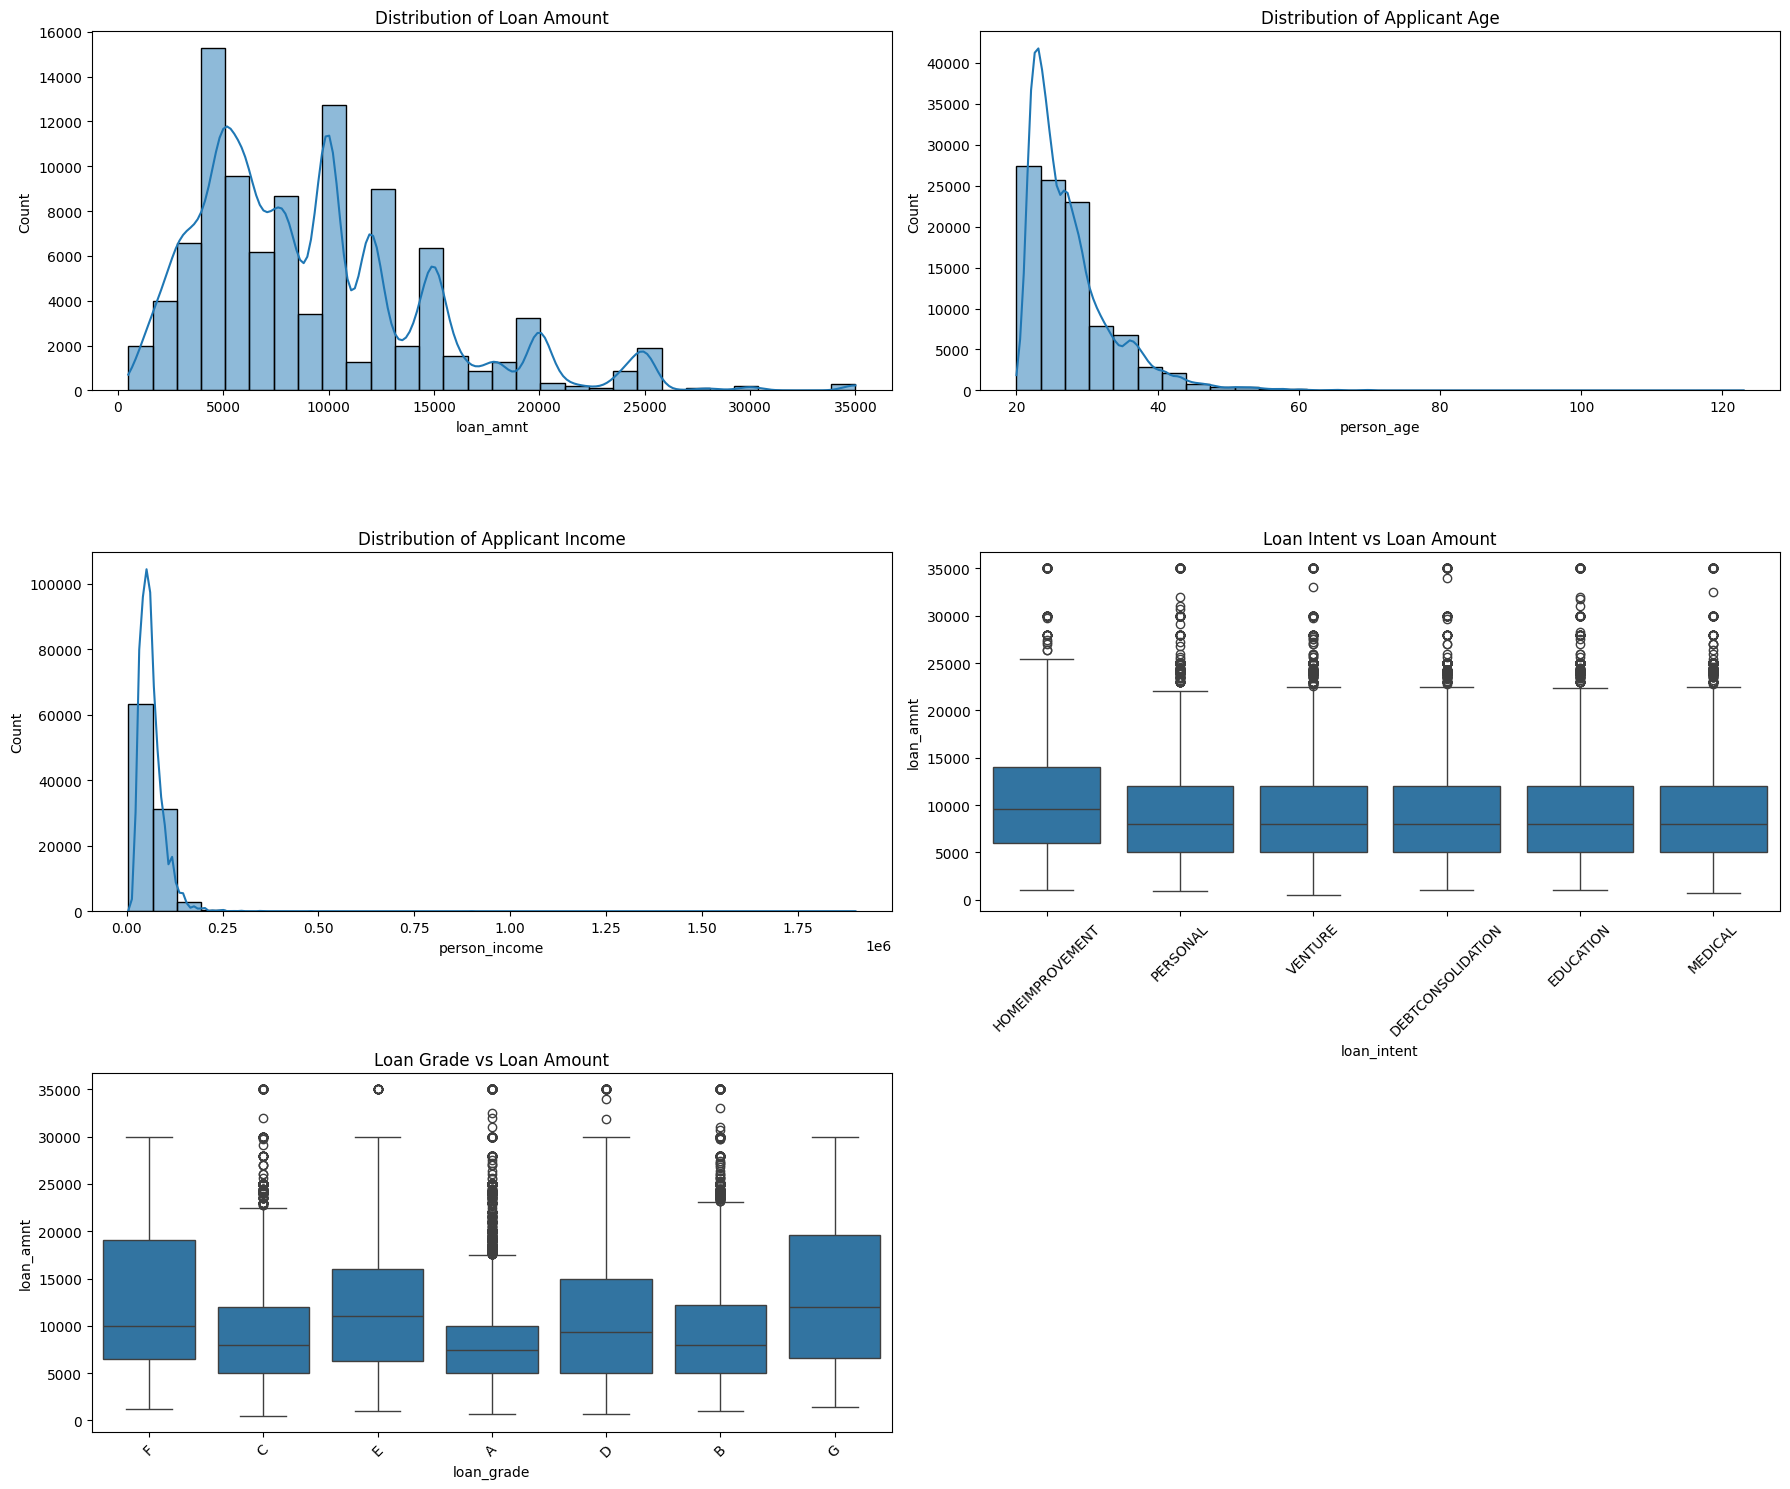

In [12]:
# Set up the plotting environment
plt.figure(figsize=(18, 15))

# Distribution of the target variable (loan_amnt)
plt.subplot(3, 2, 1)
sns.histplot(df['loan_amnt'], kde=True, bins=30)
plt.title('Distribution of Loan Amount')

# Age distribution
plt.subplot(3, 2, 2)
sns.histplot(df['person_age'], kde=True, bins=30)
plt.title('Distribution of Applicant Age')

# Income distribution
plt.subplot(3, 2, 3)
sns.histplot(df['person_income'], kde=True, bins=30)
plt.title('Distribution of Applicant Income')

# Loan intent vs. Loan amount
plt.subplot(3, 2, 4)
sns.boxplot(x='loan_intent', y='loan_amnt', data=df)
plt.title('Loan Intent vs Loan Amount')
plt.xticks(rotation=45)

# Loan grade vs. Loan amount
plt.subplot(3, 2, 5)
sns.boxplot(x='loan_grade', y='loan_amnt', data=df)
plt.title('Loan Grade vs Loan Amount')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


# d) Conversion of categorical variables and correlation matrix

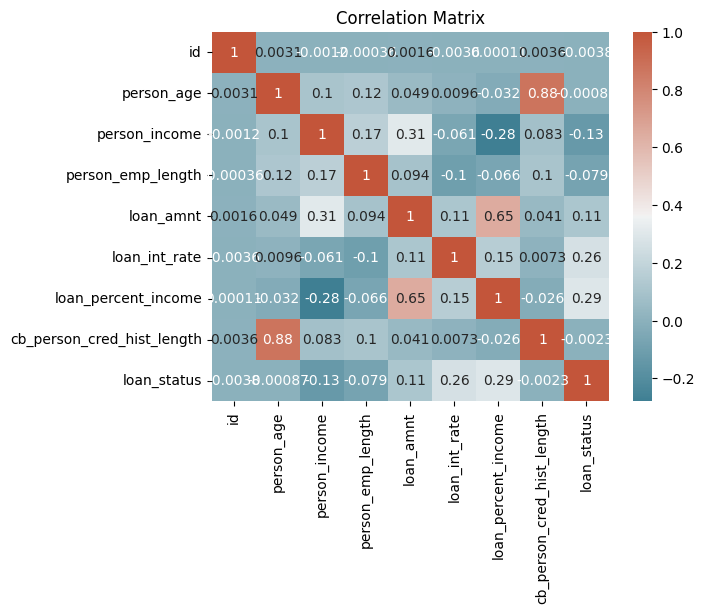

In [13]:
# Generate a correlation matrix for numerical features
Change = df.select_dtypes(include=['number'])
correlation = Change.corr()
sns.heatmap(correlation, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.title("Correlation Matrix")
plt.show()

# 3/ Baseline Machine Learning (Logistic Regression)

# a) Define features and target variable

In [14]:
X = df.drop(columns=['loan_amnt'])  # Features (all columns except the target loan amount)
y = df['loan_amnt']                 # Target variable (loan amount)

# b) Data Preprocessing


In [15]:
numerical_cols = ['person_age', 'person_income', 'person_emp_length', 'loan_int_rate', 
                  'loan_percent_income', 'cb_person_cred_hist_length']
categorical_cols = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

# Define pipelines for numerical and categorical features
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Fill missing numerical values
    ('scaler', StandardScaler())                  # Scale numerical values
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill missing categorical values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))     # One-hot encode categorical values
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_pipeline, numerical_cols),
    ('cat', categorical_pipeline, categorical_cols)
])

# c) Train Test Split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Display the shapes of the resulting datasets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (78194, 12) (78194,)
Testing set shape: (19549, 12) (19549,)


# d) Baseline (regression)

In [17]:
# Define a function to train, predict, and evaluate models
def train_and_evaluate(model, model_name):
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    
    # Train the model
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred = pipeline.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f'{model_name} - Mean Squared Error: {mse:.4f}')
    print(f'{model_name} - R² Score: {r2:.4f}')
    print('-------------------------------------------')

In [18]:
# Linear Regression
train_and_evaluate(LinearRegression(), "Linear Regression")

Linear Regression - Mean Squared Error: 8772672.9743
Linear Regression - R² Score: 0.7158
-------------------------------------------


In [19]:
# Ridge Regression
train_and_evaluate(Ridge(alpha=1.0), "Ridge Regression")

Ridge Regression - Mean Squared Error: 8772754.7974
Ridge Regression - R² Score: 0.7158
-------------------------------------------


In [20]:
# Random Forest Regressor
train_and_evaluate(RandomForestRegressor(n_estimators=100, random_state=42), "Random Forest Regressor")

Random Forest Regressor - Mean Squared Error: 650089.1106
Random Forest Regressor - R² Score: 0.9789
-------------------------------------------


In [21]:
# HistGradientBoostingRegressor
train_and_evaluate(HistGradientBoostingRegressor(random_state=42), "HistGradient Boosting Regressor")

HistGradient Boosting Regressor - Mean Squared Error: 678376.9629
HistGradient Boosting Regressor - R² Score: 0.9780
-------------------------------------------


In [22]:
# XGBoost Regressor
train_and_evaluate(xgb.XGBRegressor(random_state=42), "XGBoost Regressor")

XGBoost Regressor - Mean Squared Error: 790077.3125
XGBoost Regressor - R² Score: 0.9744
-------------------------------------------


# 4/ Iterations

Experiment Tracking